In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [2]:
DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide"
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
pref=DATA+'/Baf.single_gene'
single=sc.read(pref+'.guide_qc.h5ad')
single

Only considering the two last: ['.guide_qc', '.h5ad'].
Only considering the two last: ['.guide_qc', '.h5ad'].


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

In [3]:
#combo data
COMBO_DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/combo2"
combo=sc.read(COMBO_DATA+'/Baf.combo.analysis.h5ad')
combo

Only considering the two last: ['.analysis', '.h5ad'].
Only considering the two last: ['.analysis', '.h5ad'].


AnnData object with n_obs × n_vars = 7889 × 20018
    obs: 'n_genes', 'batch', 'SMARCE1_1', 'DPF2_4', 'BCL7C_2', 'ARID2_1', 'NTC7_IG1144056', 'PHF10_1', 'SMARCA2_4', 'BCL7B_1', 'SMARCB1_5', 'ARID1B_4', 'NTC6_IG1216445', 'NTC1_IG345439', 'PBRM1_3', 'GLTSCR1_1', 'BCL7A_3', 'GLTSCR1L_3', 'SMARCC1_7', 'ARID1A_3', 'SMARCC2_3', 'SMARCA4_4', 'SS18_2', 'SMARCD2_3', 'BRD7_2', 'SMARCD1_4', 'SS18L_1', 'BRD9_2', 'SMARCB1', 'BRD7', 'PBRM1', 'BCL7A', 'PHF10', 'ARID1A', 'SS18', 'cell', 'BCL7C', 'BCL7B', 'SMARCC1', 'GLTSCR1', 'SMARCC2', 'control', 'DPF2', 'SMARCE1', 'SMARCA4', 'BRD9', 'GLTSCR1L', 'SS18L', 'ARID2', 'SMARCD2', 'SMARCD1', 'SMARCA2', 'ARID1B', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '1', '2', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '

In [ ]:
COMBO_DATA="/Users/ursuo/Documents/research/baf/data/2021-06-17/combo2"
combo=sc.read(COMBO_DATA+'/Baf_combo.analysis.2021-06-17.h5ad')
combo

In [4]:
#combine variable genes
var_single=single.var_names[single.var['highly_variable']]
var_combo=combo.var_names[combo.var['highly_variable']]
var_single2=list(set(var_single).intersection(set(combo.var_names)))
var_combo2=list(set(var_combo).intersection(set(single.var_names)))
var_genes=list(set(var_single2).union(set(var_combo2)))

print(len(var_single))
print(len(var_combo))
print(len(var_genes))

1246
1761
1872


In [5]:
full=single[:,var_genes].concatenate([combo[:,var_genes]]).copy()
full

AnnData object with n_obs × n_vars = 60041 × 1872
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS18

In [ ]:
single_raw=sc.AnnData(single.raw[:,var_genes].X)#.toarray())
single_raw.obs_names=single.obs_names
single_raw.var_names=var_genes
single_raw.obs=single.obs

In [ ]:
single_raw

In [ ]:
combo_raw=sc.AnnData(combo.raw[:,var_genes].X)#.toarray())
combo_raw.obs_names=combo.obs_names
combo_raw.var_names=var_genes
combo_raw.obs=combo.obs

In [ ]:
full=single_raw.concatenate([combo_raw]).copy()
full

In [ ]:
full=single_raw.concatenate(combo_raw)
full

In [ ]:
#sc.pp.scale(full, max_value=10)

In [6]:
sc.tl.pca(full)

computing PCA
    with n_comps=50
    finished (0:00:04)


In [7]:
sc.pp.neighbors(full)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)


In [8]:
#sc.tl.leiden(full)

In [9]:
sc.tl.umap(full)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:44)


... storing 'louvain' as categorical
... storing 'BCL7C_4' as categorical
... storing 'BRD7_4' as categorical
... storing 'ACTL6B_2' as categorical
... storing 'PBRM1_4' as categorical
... storing 'SMARCA2_1' as categorical
... storing 'SMARCE1_2' as categorical
... storing 'PHF10_3' as categorical
... storing 'BRD7_3' as categorical
... storing 'GLTSCR1L_2' as categorical
... storing 'ARID2_4' as categorical
... storing 'DPF1_3' as categorical
... storing 'SMARCA4_1' as categorical
... storing 'DPF3_2' as categorical
... storing 'ACTL6A_3' as categorical
... storing 'DPF3_3' as categorical
... storing 'SMARCA4_7' as categorical
... storing 'PBRM1_1' as categorical
... storing 'BCL7A_2' as categorical
... storing 'ARID1A_7' as categorical
... storing 'BCL7C_3' as categorical
... storing 'SMARCD3_1' as categorical
... storing 'GLTSCR1_4' as categorical
... storing 'DPF1_1' as categorical
... storing 'SMARCD1_2' as categorical
... storing 'SMARCD3_3' as categorical
... storing 'SMARCE1_3

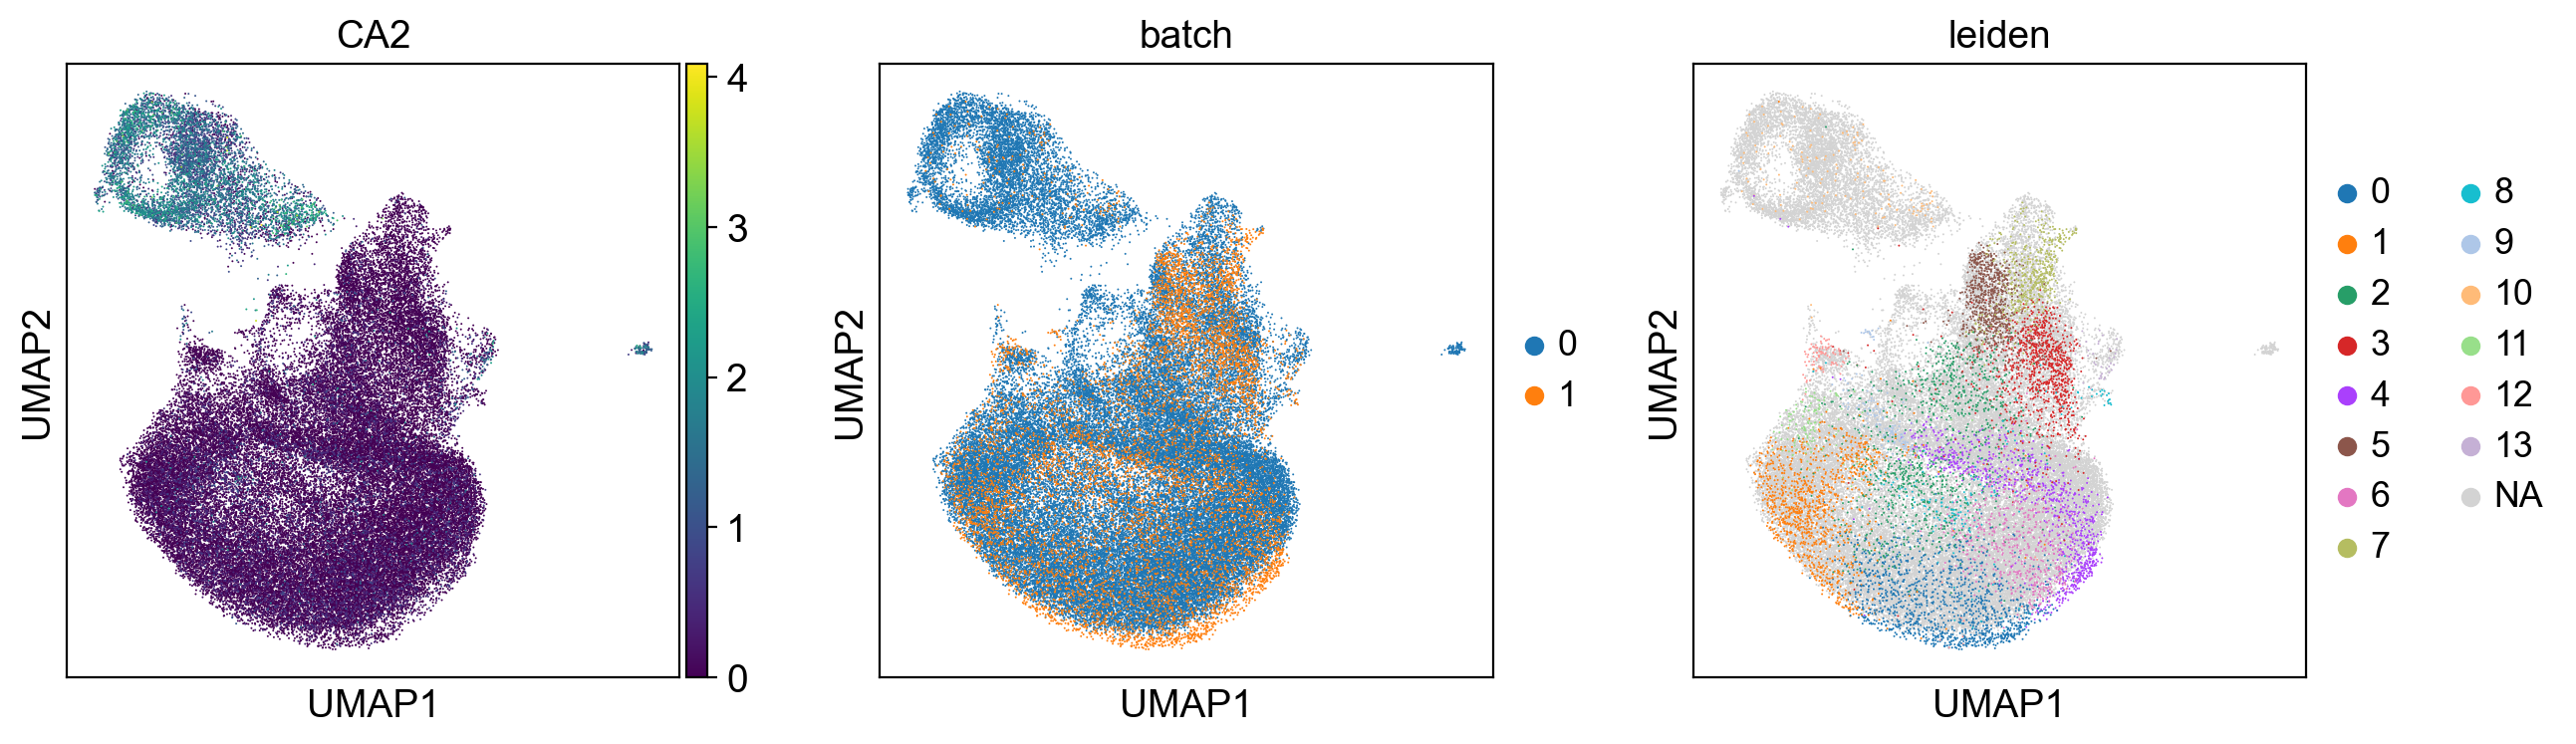

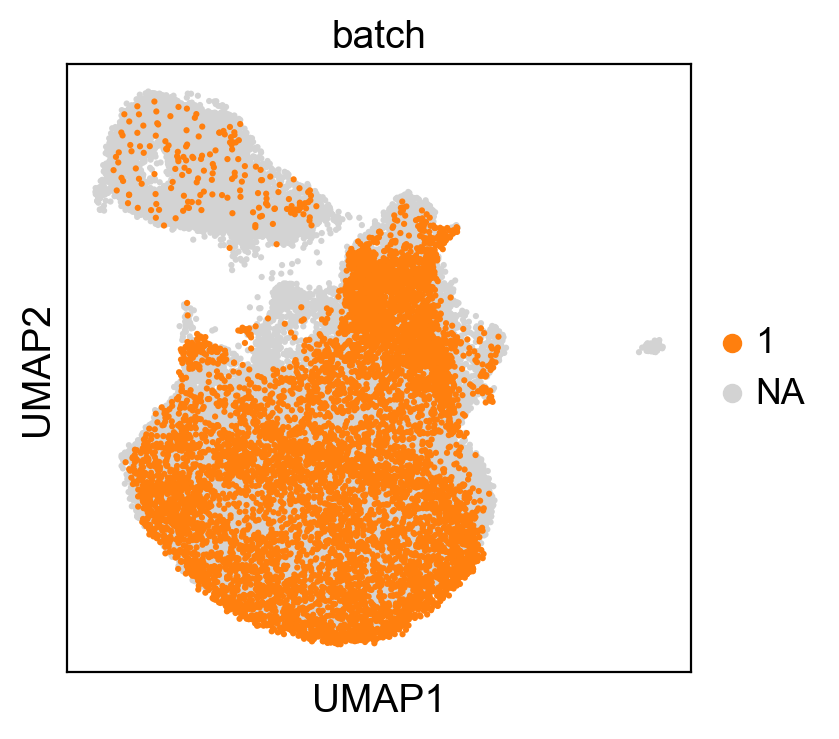

In [10]:
sc.pl.umap(full,color=['CA2','batch','leiden'])
sc.pl.umap(full,color=['batch'],groups=['1'],s=20)

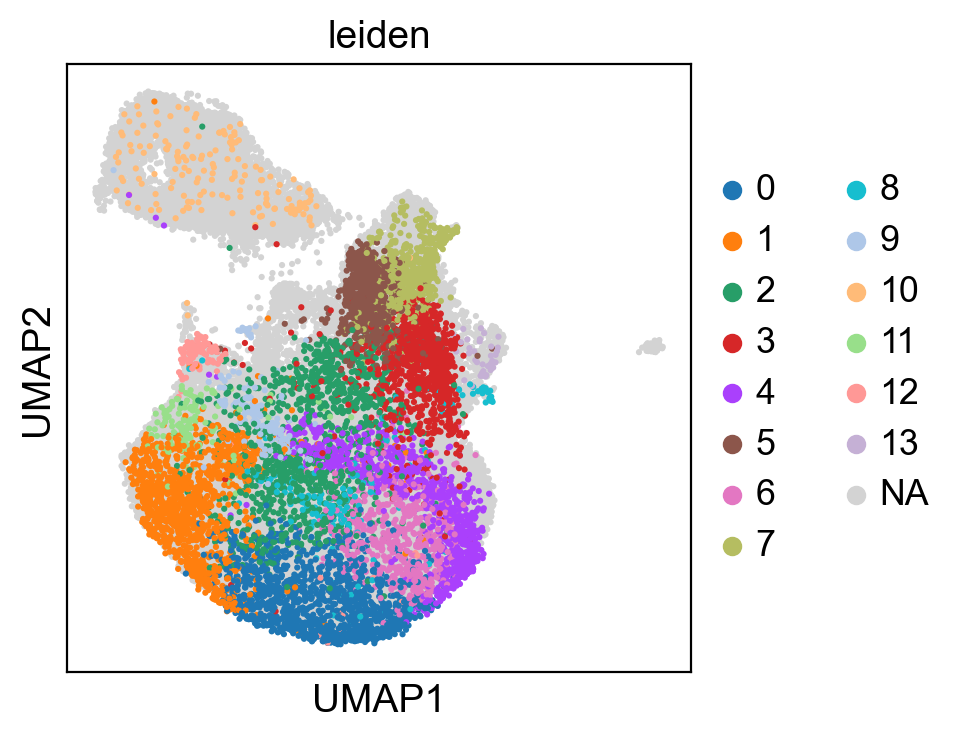

In [11]:
sc.pl.umap(full,color=['leiden'],s=20)

In [ ]:
a=plt.hist(single_raw.X[:,:1000].flatten(),100,label='single',density=True,cumulative=True,histtype='step',
           color='blue',
          fill=False)
a=plt.hist(combo_raw.X[:,:1000].flatten(),100,label='combo',density=True,cumulative=True,histtype='step',
          fill=False,color='orange',
          )


In [ ]:
full=single[:,shared_genes].concatenate([combo[:,shared_genes]]).copy()
full

In [ ]:
#combine variable genes
var_single=single.var_names[single.var['highly_variable']]
var_combo=combo.var_names[combo.var['highly_variable']]
var_single2=list(set(var_single).intersection(set(combo.var_names)))
var_combo2=list(set(var_combo).intersection(set(single.var_names)))
var_genes=list(set(var_single2).union(set(var_combo2)))

print(len(var_single))
print(len(var_combo))
print(len(var_genes))

In [ ]:
single_var=single[:,var_genes]
full=single[:,var_genes].concatenate([combo[:,var_genes]]).copy()
full

In [ ]:
full.write('full.h5ad')

In [ ]:
sc.tl.pca(full)

In [ ]:
sc.pp.neighbors(full)

In [ ]:
sc.tl.leiden(full)

In [ ]:
sc.tl.umap(full)

In [ ]:
sc.pl.umap(full,color=['CA2','batch','leiden'])
sc.pl.umap(full,color=['batch'],groups=['1'],s=20)

In [ ]:
adata.obs['gene.compact'].value_counts()

In [ ]:
#FILTERING
cell_state_cells=set(adata.obs_names[adata.obs['cell_state']=='state1'])
guide_qc_cells=set(adata.obs_names[adata.obs['guide_qc']=='passed'])
keep=list(cell_state_cells.intersection(guide_qc_cells))
print(len(keep))

adata=adata[keep,:]
adata._init_as_actual(adata.copy())
adata

In [ ]:
sc.pl.umap(adata,color='louvain')

In [ ]:
adata.obs['louvain'].value_counts()['9']/adata.obs['louvain'].value_counts().sum()

In [ ]:
(single.obs['louvain'].value_counts()['8']+single.obs['louvain'].value_counts()['6'])/single.n_obs

In [ ]:
sc.pl.umap(single,color='louvain')

In [ ]:
sc.pl.umap(adata,color='CA2')

In [ ]:
#co-embed, in order to find the second cluster to remove
full=sc.pp.concat(single,adata)